In [1]:
"""A telecommunications organization has offices spanned across multiple
locations around the globe. It has to use leased phone lines for connecting all these offices with
each other. The organization, wants to use minimum cost for connecting all its offices. This
requires that all the offices should be connected using a minimum number of leased lines so as to
reduce the effective cost.

A. Consider the following for deciding connections in same state in India:
i. Find the latitude and longitude of cities in same state. Consider 4 to 6 cities.
ii. Calculate the cost of connecting each pair of offices by computing the distance
between different pair of different cities (as considered in part A) and construct a
fully connected graph.
iii. Compute a minimum spanning tree using either Prims or Kruskals Method to find the
cost of connecting offices in different cities.
B. Repeat the above for cities in different states.
"""


# Part 1: Getting the locations of the cities
selected_cities = ['nagpur','pune','aurangabad','mumbai','delhi','goa']
longitude_and_latitude = []



from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="prims_algo_excercise")

for city in selected_cities:
    location = geolocator.geocode(city)
    longitude_and_latitude.append((location.longitude,location.latitude))

print(longitude_and_latitude)



[(79.0820556, 21.1498134), (73.8544541, 18.521428), (75.3390241, 19.877263), (72.82810491917377, 18.9733536), (77.1716954, 28.6273928), (74.0855134, 15.3004543)]


In [2]:
# Part 2: Calculating the distance between the cities
from geopy.distance import geodesic

distance_matrix = []

for i in range(len(longitude_and_latitude)):
    distance_matrix.append([])
    for j in range(len(longitude_and_latitude)):
        print(f'Distance between {selected_cities[i]} and {selected_cities[j]} is {geodesic(longitude_and_latitude[i],longitude_and_latitude[j]).km:.2f} km')
        distance_matrix[i].append(geodesic(longitude_and_latitude[i],longitude_and_latitude[j]).km)

for i in range(len(distance_matrix)):
    # print(f'{distance_matrix[i]}','\n')
    for j in range(len(distance_matrix[i])):
        print(f'{distance_matrix[i][j]:.2f} |',end=' ')
    print('\n')

Distance between nagpur and nagpur is 0.00 km
Distance between nagpur and pune is 587.44 km
Distance between nagpur and aurangabad is 419.02 km
Distance between nagpur and mumbai is 700.47 km
Distance between nagpur and delhi is 273.46 km
Distance between nagpur and goa is 577.31 km
Distance between pune and nagpur is 587.44 km
Distance between pune and pune is 0.00 km
Distance between pune and aurangabad is 170.50 km
Distance between pune and mumbai is 115.45 km
Distance between pune and delhi is 464.32 km
Distance between pune and goa is 102.60 km
Distance between aurangabad and nagpur is 419.02 km
Distance between aurangabad and pune is 170.50 km
Distance between aurangabad and aurangabad is 0.00 km
Distance between aurangabad and mumbai is 281.60 km
Distance between aurangabad and delhi is 308.90 km
Distance between aurangabad and goa is 194.15 km
Distance between mumbai and nagpur is 700.47 km
Distance between mumbai and pune is 115.45 km
Distance between mumbai and aurangabad is 

In [3]:
# Part3: Entering the graph in the csv file
import csv

with open('/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph4.csv','w') as file:
    writer = csv.writer(file)
    writer.writerow([''] + selected_cities)
    for i in range(len(distance_matrix)):
        writer.writerow([selected_cities[i]] + distance_matrix[i])

In [34]:
# Converting all the above steps into a function
def create_graph(selected_cities,filename):
    longitude_and_latitude = []
    from geopy.geocoders import Nominatim
    geolocator = Nominatim(user_agent="prims_algo_excercise")
    for city in selected_cities:
        location = geolocator.geocode(city)
        longitude_and_latitude.append((location.longitude,location.latitude))
    distance_matrix = []
    for i in range(len(longitude_and_latitude)):
        distance_matrix.append([])
        for j in range(len(longitude_and_latitude)):
            distance_matrix[i].append(geodesic(longitude_and_latitude[i],longitude_and_latitude[j]).km)
    with open(filename,'w') as file:
        writer = csv.writer(file)
        writer.writerow([''] + selected_cities)
        for i in range(len(distance_matrix)):
            writer.writerow([selected_cities[i]] + distance_matrix[i])
    return distance_matrix


# for 4 cities in same state
selected_cities_4_in_same = ['nagpur','pune','aurangabad','mumbai']

# for 5 cities in same state
selected_cities_5_in_same = ['nagpur','pune','aurangabad','mumbai','latur']


# for 6 cities in same state
selected_cities_6_in_same = ['nagpur','pune','aurangabad','mumbai','latur','solapur']

# for 4 cities in different states
selected_cities_4_in_different = ['nagpur','delhi','kochi','patna']

# for 5 cities in different states
selected_cities_5_in_different = ['nagpur','delhi','kochi','patna','bangalore']

# for 6 cities in different states
selected_cities_6_in_different = ['nagpur','delhi','kochi','patna','bangalore','goa']


# Part 4: Creating the graph for 4 cities in same state
create_graph(selected_cities_4_in_same,'/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_4_cities.csv')

# Part 5: Creating the graph for 5 cities in same state
create_graph(selected_cities_5_in_same,'/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_5_cities.csv')

# Part 6: Creating the graph for 6 cities in same state
create_graph(selected_cities_6_in_same,'/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_6_cities.csv')

# Part 7: Creating the graph for 4 cities in different states
create_graph(selected_cities_4_in_different,'/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_4_cities.csv')

# Part 8: Creating the graph for 5 cities in different states
create_graph(selected_cities_5_in_different,'/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_5_cities.csv')

# Part 9: Creating the graph for 6 cities in different states
create_graph(selected_cities_6_in_different,'/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_6_cities.csv')

[[0.0,
  273.4628909186685,
  412.71795226669076,
  677.6185512310851,
  248.20717230636185,
  577.3084262530367],
 [273.4628909186685,
  0.0,
  487.87698430583146,
  889.1555168174198,
  383.5126013172784,
  503.00181332302566],
 [412.71795226669076,
  487.87698430583146,
  0.0,
  1021.9199458631721,
  168.23589037701714,
  285.02117266639897],
 [677.6185512310851,
  889.1555168174198,
  1021.9199458631721,
  0.0,
  862.555831981093,
  1244.9531644885553],
 [248.20717230636185,
  383.5126013172784,
  168.23589037701714,
  862.555831981093,
  0.0,
  396.24262386578744],
 [577.3084262530367,
  503.00181332302566,
  285.02117266639897,
  1244.9531644885553,
  396.24262386578744,
  0.0]]

       Source Destination  Weight
0       latur     solapur   68.48
1     solapur  aurangabad   87.62
2  aurangabad        pune  170.50
3        pune      mumbai  110.40
4        pune      nagpur  296.69


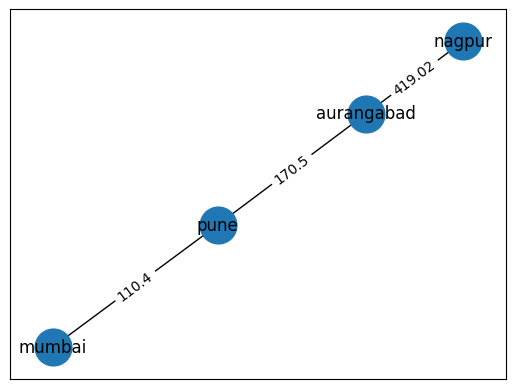

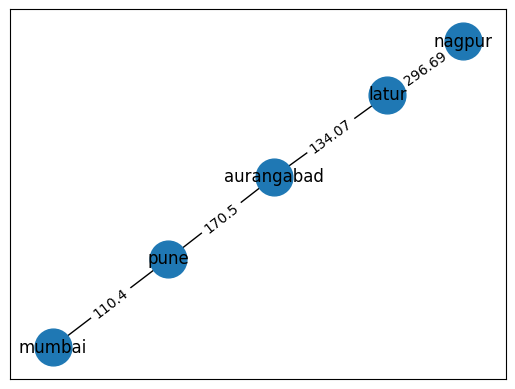

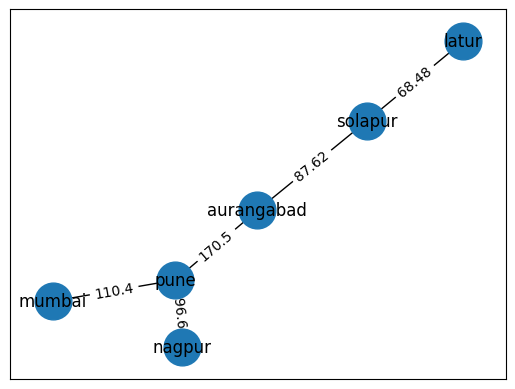

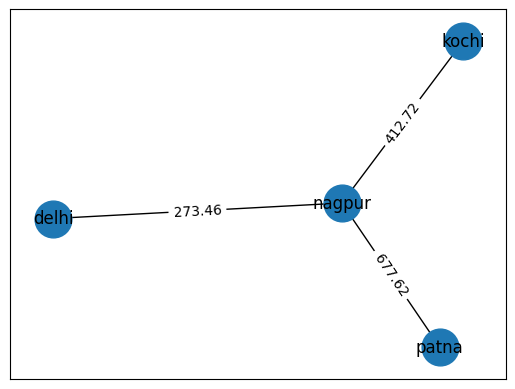

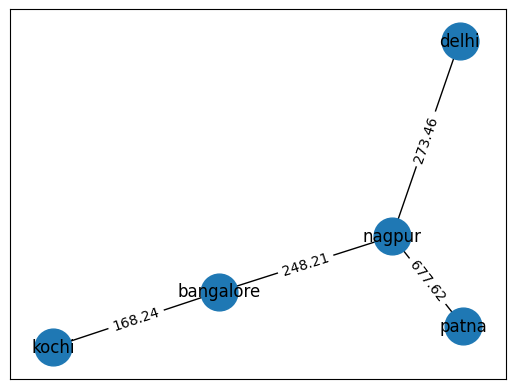

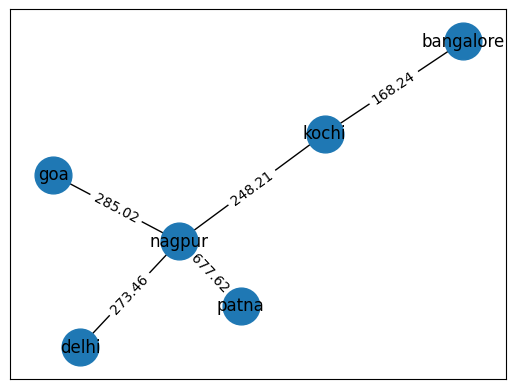

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# function to replace numbers with city names
def convert_result_to_city_names(result,adjacency_matrix):
    result = result.tolist()
    result[0] = int(result[0])
    result[1] = int(result[1])
    return adjacency_matrix.columns[result[0]+1],adjacency_matrix.columns[result[1]+1]


# function to replace all the rows in the result with city names
def convert_all_result_to_city_names(df,adjacency_matrix):
    result = []
    for i in range(len(df)):
        result.append(convert_result_to_city_names(df.iloc[i,:],adjacency_matrix))
    return result


# function to replace source and destination column values with city names
def replace_source_and_destination_with_city_names(df,adjacency_matrix):
    result = convert_all_result_to_city_names(df,adjacency_matrix)
    for i in range(len(result)):
        df.iloc[i,0] = result[i][0]
        df.iloc[i,1] = result[i][1]
    return df


# function that reads the result csv and ajacency matrix csv and returns the result with city names
def get_result_with_city_names(result_csv,adjacency_matrix_csv):
    df = pd.read_csv(result_csv)
    adjacency_matrix = pd.read_csv(adjacency_matrix_csv)
    return replace_source_and_destination_with_city_names(df,adjacency_matrix)

# function to plot the graph using networkx with labels as city names
def plot_graph(res):
    G = nx.Graph()
    for i in range(len(res)):
        G.add_edge(res.iloc[i,0],res.iloc[i,1],weight=res.iloc[i,2])
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,node_size=700)
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_labels(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    plt.show()


# make a single function to using all the functions above to plot the graph
def plot_graph_from_csv(result_csv,adjacency_matrix_csv):
    res = get_result_with_city_names(result_csv,adjacency_matrix_csv)
    plot_graph(res)


# plot the graph for 4 cities in same state
plot_graph_from_csv('/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_4_cities_result.csv','/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_4_cities.csv')

# plot the graph for 5 cities in same state
plot_graph_from_csv('/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_5_cities_result.csv','/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_5_cities.csv')

# plot the graph for 6 cities in same state
plot_graph_from_csv('/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_6_cities_result.csv','/workspaces/DSA/prims-algorithm-on-map/data/within_state_graph_6_cities.csv')

# plot the graph for 4 cities in different states
plot_graph_from_csv('/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_4_cities_result.csv','/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_4_cities.csv')

# plot the graph for 5 cities in different states
plot_graph_from_csv('/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_5_cities_result.csv','/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_5_cities.csv')

# plot the graph for 6 cities in different states
plot_graph_from_csv('/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_6_cities_result.csv','/workspaces/DSA/prims-algorithm-on-map/data/between_state_graph_6_cities.csv')

